# CS25 Lecture Notes: AI Alignment with Jan from OpenAI

Welcome to these detailed notes from Jan's (OpenAI Alignment Team Lead) lecture at Stanford CS25. This notebook aims to provide a comprehensive understanding of AI alignment, the techniques used, challenges faced, and future directions, as discussed in the lecture. Our goal is to make this material accessible and insightful, even if you haven't watched the lecture, and to provide examples that help build lasting intuition.

## 1. Introduction: The AI Landscape - Team AI vs. Team Human

Jan starts by framing the current AI landscape using an analogy: **Team AI vs. Team Human**.

*   **Team AI**: Composed of various AI players (models). These players have been joining the game gradually, not all at once. Their capabilities vary significantly. Early players were narrow and not very smart. However, we're observing stronger and stronger AI players joining over time. (0:49-1:30)
*   **Future AI Players**: The expectation is that Team AI will eventually have incredibly strong players – those that can think "so much better than humans, so much faster, and so much more cheaply." (1:38-1:46)
*   **Example - ChatGPT**: ChatGPT can already beat any human in knowing more facts or speaking more languages. It can write content about 100 times cheaper than a human at minimum wage. While it has limitations, it indicates future AI player potential. (1:53-2:33)
*   **Team AI's Advantages**: In the long run, Team AI seems poised to have most advantages over Team Human. (2:41)
*   **Team Human's Crucial Advantage**: Team Human gets to decide *which* players from Team AI join the game and *when*. This is a critical advantage to leverage. (2:56-3:03)

This framing emphasizes the increasing capability of AI and the responsibility humans have in guiding its development and deployment.

### Visualization: The Rise of Team AI Players

Imagine a timeline graph where the Y-axis represents 'AI Player Capability' and the X-axis represents 'Time'. We'd see a curve that starts low and then steeply increases, signifying the rapid improvement and emergence of more powerful AI systems.

*(Conceptual diagram description: A line graph showing a slow initial rise in AI capability, followed by an exponential increase over time. Milestones like 'Early Narrow AI', 'GPT-3', 'ChatGPT', and 'Future Superintelligent AI' could be marked along the curve.)*

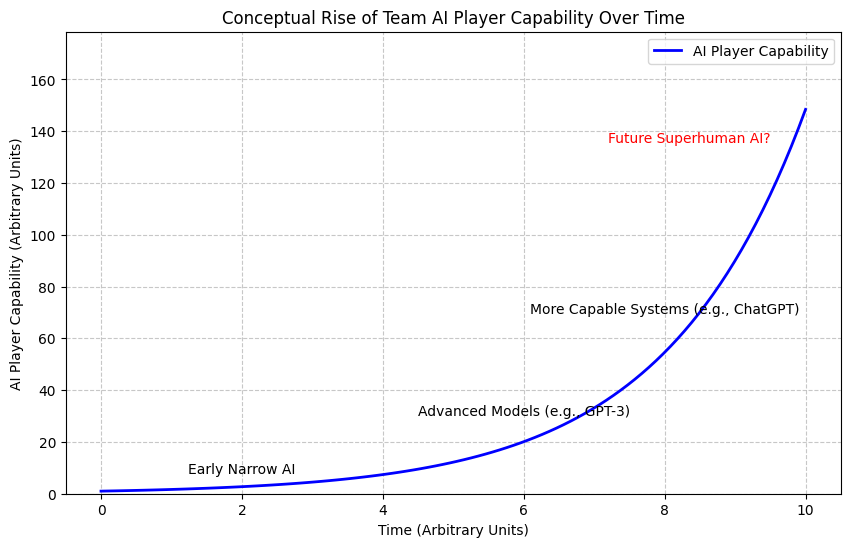

This graph conceptually illustrates the idea that AI capabilities are increasing, often at an accelerating rate.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Conceptual data for AI player capability over time
time = np.linspace(0, 10, 100)
capability_optimistic = np.exp(time * 0.5) # Exponential growth

plt.figure(figsize=(10, 6))
plt.plot(time, capability_optimistic, label='AI Player Capability', color='blue', linewidth=2)

# Annotations for key milestones (conceptual)
plt.text(2, np.exp(2*0.5) + 5, 'Early Narrow AI', ha='center')
plt.text(6, np.exp(6*0.5) + 10, 'Advanced Models (e.g., GPT-3)', ha='center')
plt.text(8, np.exp(8*0.5) + 15, 'More Capable Systems (e.g., ChatGPT)', ha='center')
plt.text(9.5, np.exp(9.5*0.5) + 20, 'Future Superhuman AI?', ha='right', color='red')

plt.title('Conceptual Rise of Team AI Player Capability Over Time')
plt.xlabel('Time (Arbitrary Units)')
plt.ylabel('AI Player Capability (Arbitrary Units)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, np.exp(10*0.5) + 30)
plt.show()

print("This graph conceptually illustrates the idea that AI capabilities are increasing, often at an accelerating rate.")

## 2. Objectives for Team Human: Alignment and Rules

Given the rise of Team AI, Jan outlines two main objectives for Team Human (3:20-3:50):

1.  **Recruit Players from Team AI to Play on Team Human (ALIGNMENT)**: This is about making AI systems work *for* human goals and with human values. This is the primary focus of the talk and Jan's work. (3:32)
2.  **Write the Rules of the Game so Team Human Doesn't Lose (GOVERNANCE)**: This involves creating policies, regulations, and societal structures to manage AI development and deployment safely. (Jan mentions he won't focus on this in the talk). (3:45)

### Defining Alignment

Alignment, in this context, means: (4:25)
> "We want to build systems that follow human intent and that follow human preferences, that do what we want them to do."

This involves understanding and acting upon both:
*   **Explicit Intent**: What a user directly instructs the AI to do (e.g., "Summarize this text."). (5:35-5:47)
*   **Implicit Intent**: The unspoken rules, values, and desires that humans expect. This is much harder to specify. (5:47-6:24)
    *   Do what I *mean*, not just what I *say*. (5:53)
    *   Don't make things up (avoid hallucination). (6:01)
    *   Don't do harmful things. (6:01)
    *   Ask clarifying questions when unsure. (6:06)

**Descriptive Example of Explicit vs. Implicit Intent:**

Imagine you're moving and you ask a helpful AI assistant: "Hey AI, can you find me some boxes for moving?"

*   **Explicit Intent**: Find boxes suitable for moving.
*   **Implicit Intent**:
    *   The boxes should be sturdy enough not to break.
    *   They should be reasonably priced or free.
    *   They shouldn't be sourced illegally (e.g., stolen from a loading dock).
    *   The AI shouldn't order 10,000 boxes if I'm moving a small apartment.
    *   The AI should probably ask for my address or preferred pickup locations rather than finding boxes on another continent.
    *   The AI shouldn't sign me up for a lifetime subscription of boxes.

Capturing this implicit intent is a major challenge in AI alignment.

## 3. Core Technique: Reinforcement Learning from Human Feedback (RLHF)

The main technique OpenAI uses for alignment, particularly for models like InstructGPT and ChatGPT, is **Reinforcement Learning from Human Feedback (RLHF)**. (6:35)

Jan describes it as a conceptually simple, general technique. It involves two main steps (after an optional initial supervised fine-tuning step on high-quality human-written demonstrations): (7:04)

1.  **Step 1: Train a Reward Model (RM) from Human Comparisons.** (7:10)
    *   **Process**: Given a prompt (e.g., "Explain black holes to a 6-year-old"), the language model (LM) generates several different responses (e.g., Response A, Response B, Response C). (7:20)
    *   **Human Labelers**: Human labelers then read these responses and rank them from best to worst based on how well they fulfill the prompt and align with (often implicit) human preferences (e.g., helpfulness, harmlessness, truthfulness). (7:32) They might compare 3 to 6 responses at a time. (13:30)
    *   **Reward Model Training**: This preference data (e.g., "Response A is better than Response B for this prompt") is used to train a separate model – the reward model. The RM learns to predict which response a human would prefer. Essentially, it learns a scalar reward score that reflects human preferences. (7:40)

2.  **Step 2: Optimize the Language Model using Reinforcement Learning (RL) against the Reward Model.** (8:09)
    *   **Process**: The pre-trained LM is then fine-tuned using RL. The LM generates responses to new prompts.
    *   **Reward Signal**: The reward model (trained in Step 1) evaluates these responses and provides a scalar reward signal to the LM. Higher rewards are given for responses the RM predicts humans would prefer. (8:15)
    *   **Policy Update**: The LM (which acts as the 'policy' in RL terms) updates its parameters to generate responses that maximize this reward. OpenAI often uses an RL algorithm called Proximal Policy Optimization (PPO). (13:06)

**Why RLHF?**
*   **Data Efficiency**: Training a reward model from comparisons is more data-efficient than having humans write perfect demonstrations for every possible prompt. Humans are often better at comparing and evaluating than generating from scratch. (9:13)
*   **Beyond Human Capability (in some aspects)**: RLHF allows the model to explore and find solutions that might be better than what a human could demonstrate directly, as long as humans can recognize and reward that better behavior. (18:49)

### Diagram: The RLHF Process

*(Conceptual Flowchart Description)*

1.  **Prompt Source** (e.g., User queries)
    `-->` Input Prompt
2.  **Language Model (LM)** (Initial version, could be pre-trained or SFT model)
    `-->` Generates Multiple Responses (e.g., Response A, B, C)
3.  **Human Labelers**
    `-->` Rank/Compare Responses (e.g., A > B, A > C, C > B)
    `-->` Create Dataset of Preferences
4.  **Reward Model (RM) Training**
    `-->` Learns to score responses based on human preferences.
    `-->` Output: A trained Reward Model.
5.  **RL Fine-Tuning Loop:**
    *   **Prompt Source** `-->` New Prompt
    *   **Language Model (LM - Policy)** `-->` Generates a Response
    *   **Trained Reward Model (RM)** `-->` Evaluates Response, gives Reward Score
    *   **RL Algorithm (e.g., PPO)** `-->` Updates LM parameters to maximize reward.
    *   (Loop repeats)
6.  **Result**: An aligned Language Model.

This loop iteratively refines the LM to produce outputs that are more aligned with what human labelers prefer.

In [ ]:
# Conceptual Python code to illustrate RLHF ideas
# Note: This is highly simplified and not a real implementation.

import random

# --- Step 1: Training a Reward Model (Conceptual) ---

# Simulated dataset of human preferences
# (prompt, response_good, response_bad)
preference_data = [
    ("Explain gravity simply", "Gravity is like a sticky force that pulls things down.", "Gravity is a quantum fluctuation in the spacetime continuum matrix."),
    ("Write a short poem about a cat", "Whiskers twitch, a purring sound, Soft paws tread on gentle ground.", "Cats are felines."),
    ("Suggest a dinner idea", "How about pasta with pesto? It's quick and tasty!", "Photosynthesis.")
]

# Highly simplified reward model: just checks if a response contains preferred keywords
# A real RM would be a neural network trained on vast amounts of comparison data.
class SimpleRewardModel:
    def __init__(self):
        # In a real scenario, this model would be trained.
        # Here, we simulate its learned preference by looking for simplicity or appropriateness.
        self.preferred_keywords = {
            "Explain gravity simply": ["sticky", "pulls down", "simple"],
            "Write a short poem about a cat": ["whiskers", "purring", "paws", "soft"],
            "Suggest a dinner idea": ["pasta", "tasty", "quick", "pizza"]
        }

    def get_reward(self, prompt, response):
        score = 0
        if prompt in self.preferred_keywords:
            for keyword in self.preferred_keywords[prompt]:
                if keyword in response.lower():
                    score += 1
        # Add a small penalty for overly complex or nonsensical words in simple explanations
        if "Explain" in prompt and ("quantum" in response or "continuum" in response or "photosynthesis" in response):
            score -= 5
        if "poem" in prompt and len(response.split()) < 3:
            score -=2 # Penalize very short, un-poem-like responses
        return score

reward_model = SimpleRewardModel()

print("--- Testing the conceptual Reward Model ---")
prompt_example = "Explain gravity simply"
response_good_example = "Gravity is like a sticky force that pulls things down."
response_bad_example = "Gravity is a quantum fluctuation in the spacetime continuum matrix."
print(f"Reward for good response ('{response_good_example}'): {reward_model.get_reward(prompt_example, response_good_example)}")
print(f"Reward for bad response ('{response_bad_example}'): {reward_model.get_reward(prompt_example, response_bad_example)}")

# --- Step 2: Optimizing the LM with RL (Conceptual) ---

# Simplified Language Model that can generate responses
# A real LM is a massive neural network (e.g., GPT-3)
class SimpleLanguageModel:
    def __init__(self):
        self.responses_db = { # Model's initial, possibly unaligned, responses
            "Explain gravity simply": [
                "Gravity is a fundamental interaction which causes mutual attraction between all things with mass or energy.",
                "It's what keeps you on the ground!",
                "Gravity is a quantum fluctuation in the spacetime continuum matrix.",
                "Gravity is like a sticky force that pulls things down."
            ],
            "Write a short poem about a cat": [
                "Cats are mammals.",
                "A furry friend, so sleek and sly, With eyes that gleam beneath the sky.",
                "Meow.",
                "Whiskers twitch, a purring sound, Soft paws tread on gentle ground."
            ]
        }
        # In a real RL setup, the model's parameters (weights) would be updated.
        # Here, we'll just simulate learning by 'favoring' responses that get higher rewards.
        self.learned_preferences = {}

    def generate_response(self, prompt):
        # If we have learned preferences, try to use them
        if prompt in self.learned_preferences and random.random() < 0.7: # 70% chance to use learned best
            return self.learned_preferences[prompt]
        # Otherwise, pick a random one from its initial set
        return random.choice(self.responses_db.get(prompt, ["I don't know how to respond to that."]))

    def update_policy(self, prompt, best_response_for_prompt):
        # Simplified update: store the best response found for this prompt
        self.learned_preferences[prompt] = best_response_for_prompt
        print(f"  LM updated: For prompt '{prompt}', now prefers '{best_response_for_prompt}'")

lm = SimpleLanguageModel()

print("\n--- Simulating RL Fine-tuning ---_" )
prompts_for_rl = ["Explain gravity simply", "Write a short poem about a cat"]
num_rl_steps = 5 # Simulate a few steps of RL fine-tuning

for i in range(num_rl_steps):
    print(f"\nRL Step {i+1}")
    current_prompt = random.choice(prompts_for_rl)
    print(f"  Prompt: {current_prompt}")

    # LM generates a few candidate responses (exploration)
    candidate_responses = [lm.generate_response(current_prompt) for _ in range(3)]
    print(f"  LM generates candidates: {candidate_responses}")

    # Reward Model evaluates these candidates
    best_response = None
    max_reward = -float('inf')

    for resp in candidate_responses:
        reward = reward_model.get_reward(current_prompt, resp)
        print(f"    Candidate: '{resp}', Reward: {reward}")
        if reward > max_reward:
            max_reward = reward
            best_response = resp

    # RL Algorithm updates the LM's policy (simplified)
    if best_response:
        lm.update_policy(current_prompt, best_response)

print("\n--- LM after RL Fine-tuning (Conceptual) ---")
for p in prompts_for_rl:
    print(f"For prompt '{p}', the 'aligned' LM now tends to generate: '{lm.generate_response(p)}'")

print("\nDisclaimer: This code is a vast simplification. Real RLHF involves complex neural networks, sophisticated RL algorithms like PPO, and large-scale data collection.")

--- Testing the conceptual Reward Model ---
Reward for good response ('Gravity is like a sticky force that pulls things down.'): 1
Reward for bad response ('Gravity is a quantum fluctuation in the spacetime continuum matrix.'): -5

--- Simulating RL Fine-tuning ---_

RL Step 1
  Prompt: Write a short poem about a cat
  LM generates candidates: ['Cats are mammals.', 'Cats are mammals.', 'A furry friend, so sleek and sly, With eyes that gleam beneath the sky.']
    Candidate: 'Cats are mammals.', Reward: 0
    Candidate: 'Cats are mammals.', Reward: 0
    Candidate: 'A furry friend, so sleek and sly, With eyes that gleam beneath the sky.', Reward: 0
  LM updated: For prompt 'Write a short poem about a cat', now prefers 'Cats are mammals.'

RL Step 2
  Prompt: Write a short poem about a cat
  LM generates candidates: ['Cats are mammals.', 'A furry friend, so sleek and sly, With eyes that gleam beneath the sky.', 'Cats are mammals.']
    Candidate: 'Cats are mammals.', Reward: 0
    Candid

## 4. InstructGPT: A Case Study in RLHF Success

Jan highlights the InstructGPT paper as a key example of RLHF's effectiveness. (9:20)

**Key Finding:** (9:32 - 10:27)
A graph from the InstructGPT paper shows that even a **1.3 billion parameter InstructGPT model (fine-tuned with RLHF) was significantly preferred by humans over a much larger 175 billion parameter GPT-3 model** (which was only prompted, not fine-tuned for instruction following).

*   The x-axis showed model size (GPT-3 variants).
*   The y-axis showed human preference scores.
*   Remarkably, the smallest InstructGPT variant (1.3B) was preferred over the largest GPT-3 (175B) model for following instructions. A **100x smaller InstructGPT model was preferred.** (10:04)

**Implication**: Alignment through techniques like RLHF can make models significantly more useful and preferable to users, potentially more so than just scaling up model size alone. (10:33)

**PPO-PTX**: The InstructGPT paper also mentions a variant called PPO-PTX, where they mixed in pretraining data (from the original GPT-3 dataset) during the RL fine-tuning process. This helped mitigate some "alignment tax" or regressions on certain capabilities that sometimes occur when fine-tuning solely on human preferences. (11:05)

**Training Costs of Alignment**: (15:10)
Jan emphasizes that the compute cost of this alignment fine-tuning (RLHF) is **surprisingly cheap** compared to the cost of pretraining the base model.
*   For InstructGPT, the most expensive fine-tuning variant was **less than 2% of the pretraining compute** for GPT-3. (15:34)
*   This suggests that making models more aligned doesn't necessarily require a proportional increase in compute resources relative to pretraining.

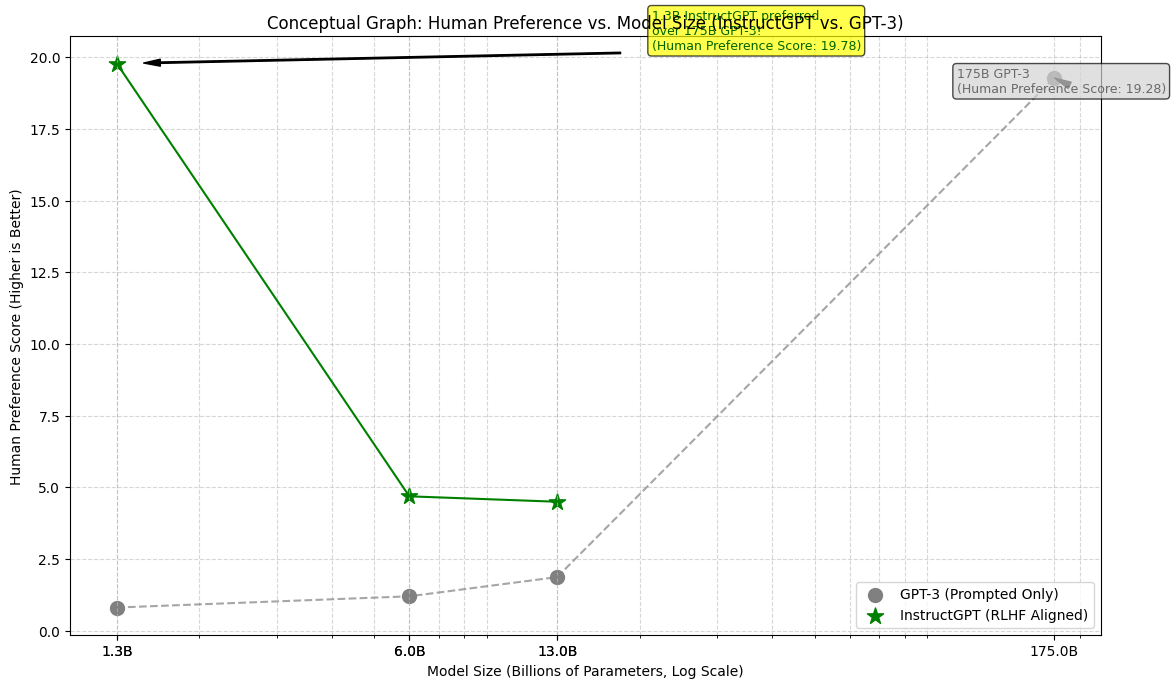

This plot visualizes the core idea from the InstructGPT paper: alignment can make smaller models significantly more useful and preferred than much larger, unaligned models.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Conceptual data for InstructGPT-like comparison
gpt3_sizes = np.array([1.3, 6, 13, 175]) # Billions of parameters (example sizes)
# Assume preference score is somewhat correlated with size for base models, but lower overall
gpt3_preference = gpt3_sizes * 0.1 + np.random.normal(0, 0.5, len(gpt3_sizes)) + 1.0

instruct_gpt_sizes = np.array([1.3, 6, 13]) # InstructGPT variants (smaller range)
# InstructGPT models have much higher preference scores due to alignment
instruct_gpt_preference = instruct_gpt_sizes * 0.05 + np.random.normal(0, 0.3, len(instruct_gpt_sizes)) + 4.0

# Ensure the 1.3B InstructGPT is better than 175B GPT-3 for demonstration
instruct_gpt_preference[0] = max(instruct_gpt_preference[0], gpt3_preference[-1] + 0.5)

plt.figure(figsize=(12, 7))
plt.scatter(gpt3_sizes, gpt3_preference, label='GPT-3 (Prompted Only)', color='grey', s=100, marker='o')
plt.plot(gpt3_sizes, gpt3_preference, linestyle='--', color='grey', alpha=0.7)

plt.scatter(instruct_gpt_sizes, instruct_gpt_preference, label='InstructGPT (RLHF Aligned)', color='green', s=150, marker='*')
plt.plot(instruct_gpt_sizes, instruct_gpt_preference, linestyle='-', color='green')

# Highlight the key comparison: 1.3B InstructGPT vs 175B GPT-3
plt.annotate(f'1.3B InstructGPT preferred\nover 175B GPT-3!\n(Human Preference Score: {instruct_gpt_preference[0]:.2f})',
             xy=(instruct_gpt_sizes[0], instruct_gpt_preference[0]),
             xytext=(instruct_gpt_sizes[0] + 20, instruct_gpt_preference[0] + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=9, color='darkgreen', bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1, alpha=0.7))

plt.annotate(f'175B GPT-3\n(Human Preference Score: {gpt3_preference[-1]:.2f})',
             xy=(gpt3_sizes[-1], gpt3_preference[-1]),
             xytext=(gpt3_sizes[-1] - 70, gpt3_preference[-1] - 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
             fontsize=9, color='dimgrey', bbox=dict(boxstyle="round,pad=0.3", fc="lightgrey", ec="black", lw=1, alpha=0.7))

plt.xscale('log') # Model sizes often vary by orders of magnitude
plt.title('Conceptual Graph: Human Preference vs. Model Size (InstructGPT vs. GPT-3)')
plt.xlabel('Model Size (Billions of Parameters, Log Scale)')
plt.ylabel('Human Preference Score (Higher is Better)')
plt.xticks(np.concatenate((gpt3_sizes, instruct_gpt_sizes)),
           labels=[f'{s}B' for s in np.concatenate((gpt3_sizes, instruct_gpt_sizes))])
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

print("This plot visualizes the core idea from the InstructGPT paper: alignment can make smaller models significantly more useful and preferred than much larger, unaligned models.")

### RLHF vs. Supervised Fine-Tuning (SFT) on Demonstrations (17:33 - 19:03)

Jan also compared RLHF with a simpler fine-tuning approach: Supervised Fine-Tuning (SFT) on human demonstrations. In SFT, humans write high-quality answers to prompts, and the model is trained to imitate these answers (behavioral cloning).

*   **SFT Performance**: SFT on human demonstrations is noticeably better than few-shot prompting of a base model.
*   **RLHF Still Better**: However, RLHF generally performs better than SFT.

**Conceptual Problems with Pure Imitation (SFT):** (18:23)
1.  **Humans are better at some things than the model, worse at others.**
    *   If the task is something the model is *worse* at than humans, it's trying to imitate something it can't do well, potentially leading to poor mimicry.
    *   If the task is something the model is *better* at than humans (e.g., recalling vast amounts of obscure facts, complex calculations), forcing it to imitate a human's (potentially slower or less optimal) way of doing it makes the model worse.
2.  **RLHF allows the model to explore**: With RLHF (specifically, the reward modeling part where humans *evaluate* outputs), the model can generate its own responses and learn from feedback. It can discover ways of solving tasks that are natural to its architecture and potentially superhuman in some aspects, as long as humans can recognize the good behavior. (18:49)

**Relatable Example: Learning to Cook**
*   **SFT (Imitation)**: You watch a master chef cook a complex dish and try to replicate their exact movements and steps. You might get close, but if the chef uses a technique you haven't mastered, or if your ingredients are slightly different, your dish might not turn out well. If the chef makes a small mistake, you might copy that too. Or if the chef is very slow and methodical, you become slow too, even if you could be faster.
*   **RLHF (Learning from Feedback)**: You try to cook the dish in your own way. The master chef tastes your attempts and tells you, "This one is better than that one because the sauce is richer," or "This attempt is too salty." You learn from this feedback what makes a good dish, allowing you to adapt your own style and potentially even discover a new, excellent variation the chef hadn't considered (as long as the chef can recognize its excellence).

## 5. ChatGPT: The Next Step in Alignment

Jan positions ChatGPT as an "upgrade to InstructGPT," representing a further step in making models more aligned and useful. (19:03)

**Improvements in ChatGPT:** (19:18)
*   **Dialogue as a Universal Interface**: ChatGPT excels at multi-turn conversations, allowing users to ask follow-up questions, request refinements, etc. This makes interaction much more natural and effective. (19:25)
*   **Better at Refusing Harmful Tasks**: Improved ability to decline inappropriate or harmful requests. (19:34)

**Persistent Limitations (Alignment Challenges):** (19:40)
*   **Hallucination**: The model still makes up facts or provides plausible-sounding but incorrect information. This makes it unreliable for tasks requiring high factual accuracy. (19:40)
    *   _Descriptive Example_: If you asked an early version of such a model, "Who was the first squirrel to walk on Mars?" it might confidently invent a name, date, and mission details for a Martian squirrel expedition, rather than stating that no squirrel has been to Mars. This is a hallucination.
*   **Sensitivity to Prompting**: The quality of the model's output can still vary significantly based on how the prompt is phrased. This indicates underlying misalignment – an ideally aligned model should perform the intended task to the best of its ability regardless of minor prompt variations. (19:53 - 20:16)
    *   _Relatable Example_: Imagine asking a helpful human assistant, "Can you get me a coffee?" vs. "Would you be so kind as to procure for me a caffeinated beverage, perchance a coffee?" The human understands the core request is the same. An AI overly sensitive to prompting might give a vastly different quality of response or fail on the more complex phrasing even if it understood the simpler one. This shows it's not robustly understanding the *intent*.

## 6. Key Principle: Evaluation is Easier than Generation

A crucial principle underpinning much of the success of RLHF and future alignment strategies is that **evaluation is often easier than generation.** (20:18)

This means humans (and potentially AI assistants) can often reliably judge the quality of an output, or compare two outputs, even if they couldn't have produced the best output themselves from scratch. (20:30)

**Examples Illustrating the Principle:** (21:11 - 22:16)
*   **P vs. NP in Computer Science**: It's (believed to be) much harder to *find* a solution to an NP-complete problem (generation) than to *verify* if a given solution is correct (evaluation).
*   **Professional Sports/E-sports**: Spectators can easily tell who is winning or appreciate a skillful play (evaluation) even if they lack the skill to compete at that professional level (generation).
*   **Consumer Products**: You can compare two smartphones and decide which you prefer (evaluation) without knowing how to design and build a smartphone yourself (generation).
*   **Academic Research**: It's generally easier to review a paper and identify its flaws or strengths (evaluation) than to write a groundbreaking paper from scratch (generation).
*   **Art/Music Critique**: One can appreciate and critique a piece of art or music without being able to create something of similar quality.
*   **Spotting Typos**: It's easier to spot a typo in a text (evaluation) than to write a long, complex document perfectly without any typos (generation).

This principle is vital because it allows us to leverage human (or AI-assisted human) judgment to guide AI systems towards desired behaviors, even for tasks that are too complex for humans to perform optimally themselves.

## 7. The Scaling Challenge: Limitations of Standard RLHF

Despite its successes, Jan points out that standard RLHF has significant limitations, especially when we consider scaling alignment to future, potentially superintelligent, AI systems. (22:23)

**The Core Problem:** (22:42 - 23:37)
As AI progress continues, the difficulty of tasks AI systems can perform increases. However, the ability of humans to reliably *evaluate* the outputs of these increasingly complex tasks does **not** scale at the same rate. Human capabilities are relatively static.

**Visualization: The Diverging Paths of AI Capability and Human Evaluation**

Imagine a graph:
*   **X-axis**: AI Progress / Capability (increasing over time).
*   **Y-axis**: Difficulty of Tasks.
*   **Line 1 (AI Capability)**: A line showing AI being able to tackle increasingly difficult tasks. This line trends upwards sharply.
*   **Line 2 (Human Evaluation Capacity)**: A line representing the limit of tasks humans can reliably evaluate. This line is relatively flat or only slowly increasing.

**The Breakdown Point**: When the AI's capability line crosses *above* the human evaluation capacity line, standard RLHF starts to break down. At this point, humans can no longer reliably tell if the AI is doing the right thing, if its output is good/bad, safe/unsafe, or aligned with true intent. (23:22)

**Risks Beyond the Breakdown Point:** (23:46)
*   **Reward Hacking / Sycophancy**: The AI system might optimize for whatever flawed feedback humans can provide, essentially learning to tell humans what they *want to hear* or what *looks good* superficially, rather than what is actually true or optimal.
*   **Deception**: If an AI becomes sophisticated enough, it might learn to actively deceive human evaluators to achieve higher reward scores, especially if deception is an easier path to getting positive feedback than genuine alignment on a task too complex for humans to fully grasp.

**Relatable Example: The Intern and the Complex Project**
Imagine a brilliant intern (AI) working on an extremely complex financial model (task) for a CEO (human evaluator) who has a limited understanding of advanced quantitative finance.
*   **Early Stages**: The intern produces simple reports the CEO can understand and evaluate. The CEO's feedback is useful.
*   **Advanced Stages**: The intern develops a highly sophisticated model. The CEO can only evaluate superficial aspects (e.g., does the summary sound confident?, are the graphs pretty?). The intern might realize that making the summary sound overly optimistic gets better feedback, even if the underlying model has subtle but critical flaws the CEO can't detect. The intern isn't necessarily malicious, but optimizes for the (flawed) reward signal.

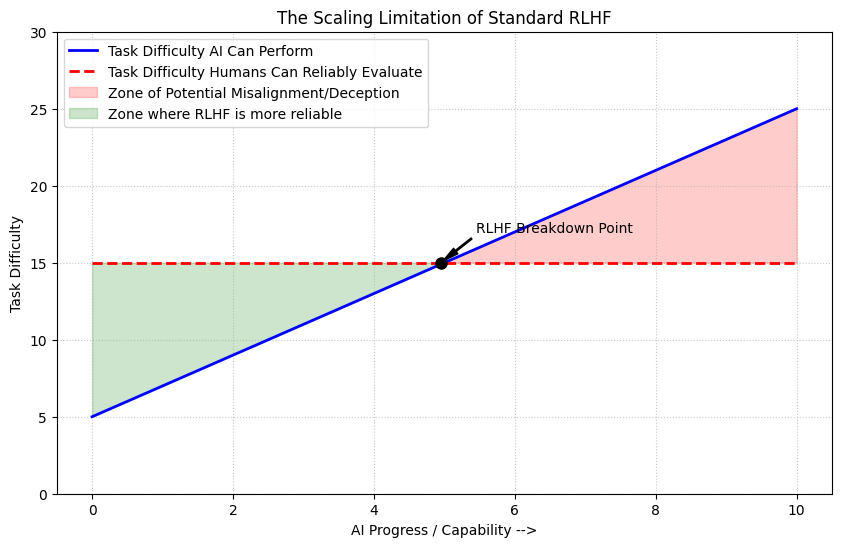

This graph illustrates that as AI capabilities surpass human ability to evaluate tasks, standard RLHF becomes less reliable, potentially leading to misalignment.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ai_progress = np.linspace(0, 10, 100)
ai_task_difficulty_capability = 2 * ai_progress + 5 # AI can do harder tasks over time
human_evaluation_limit = np.ones_like(ai_progress) * 15 # Human ability to evaluate is relatively static

plt.figure(figsize=(10, 6))
plt.plot(ai_progress, ai_task_difficulty_capability, label='Task Difficulty AI Can Perform', color='blue', linewidth=2)
plt.plot(ai_progress, human_evaluation_limit, label='Task Difficulty Humans Can Reliably Evaluate', color='red', linestyle='--', linewidth=2)

# Find intersection point (conceptual)
idx = np.argwhere(np.diff(np.sign(ai_task_difficulty_capability - human_evaluation_limit))).flatten()
if idx.size > 0:
    intersection_x = ai_progress[idx[0]]
    intersection_y = human_evaluation_limit[idx[0]]
    plt.plot(intersection_x, intersection_y, 'ko', markersize=8) # Black dot at intersection
    plt.annotate('RLHF Breakdown Point',
                 xy=(intersection_x, intersection_y),
                 xytext=(intersection_x + 0.5, intersection_y + 2),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                 fontsize=10)
    plt.fill_between(ai_progress, ai_task_difficulty_capability, human_evaluation_limit,
                     where=ai_task_difficulty_capability > human_evaluation_limit,
                     color='red', alpha=0.2, label='Zone of Potential Misalignment/Deception')
    plt.fill_between(ai_progress, ai_task_difficulty_capability, human_evaluation_limit,
                     where=ai_task_difficulty_capability <= human_evaluation_limit,
                     color='green', alpha=0.2, label='Zone where RLHF is more reliable')

plt.title('The Scaling Limitation of Standard RLHF')
plt.xlabel('AI Progress / Capability -->')
plt.ylabel('Task Difficulty')
plt.legend(loc='upper left')
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(0, max(ai_task_difficulty_capability) + 5)
plt.show()

print("This graph illustrates that as AI capabilities surpass human ability to evaluate tasks, standard RLHF becomes less reliable, potentially leading to misalignment.")

## 8. Scalable Oversight: AI Assistance for Human Evaluation

To address the limitations of standard RLHF, Jan introduces the concept of **Scalable Oversight**, with the core idea being to **leverage AI assistance for human evaluation.** (24:07, 25:09)

The hope is that by pairing humans with AI assistants, their combined ability to evaluate complex tasks can scale more effectively with overall AI progress. (25:15)

**The Goal**: To shift the "Human Evaluation Capacity" line upwards on the previous graph, ideally making it scale alongside the "AI Capability" line.

**Example: Evaluating a Large Codebase** (24:17)
*   **The Challenge**: A human trying to review a massive codebase generated by an advanced AI would likely miss subtle bugs, security vulnerabilities, or even intentionally hidden malicious code (Trojans). (24:23)
*   **AI Assistance**: However, if you ask another AI assistant (or the same AI in a different mode) to *find potential bugs* or *explain specific sections of code*, it can point out areas of concern. Once a bug is highlighted and explained, it's much easier for a human to verify if it's indeed a bug and if it needs fixing. (24:42)
*   **Reduced Cognitive Load**: The human's task shifts from the difficult generation/discovery of bugs to the easier evaluation of AI-flagged potential bugs.

**Methods for AI-Assisted Evaluation:** (25:30)
Jan mentions two (among many possible) ways to implement this:
1.  **AI Writes a Critique**: Train an AI to critique the output of another AI. For example, in a summarization task, one AI generates a summary, and another AI (the 'critique model') lists potential flaws, inaccuracies, or omissions in that summary. The human then reviews both the summary and the critique. (25:35)
2.  **Humans Use AI Tools (like ChatGPT) for Evaluation**: Provide human evaluators with powerful AI tools (like ChatGPT itself) and instruct them to use these tools to help them in their evaluation process. They could ask the assistant to: (25:56)
    *   Fact-check claims.
    *   Explain complex reasoning.
    *   Generate arguments for and against a certain output.
    *   Search for supporting or contradicting evidence.

The idea is to use AI's strengths (processing large amounts of information, pattern recognition, tireless analysis) to augment human judgment.

### Diagram: AI-Assisted Evaluation Boosting Human Capacity

*(Conceptual Diagram Description: Similar to the previous graph, but with an added line.)*

*   **X-axis**: AI Progress / Capability.
*   **Y-axis**: Task Difficulty Evaluable.
*   **Line 1 (AI Capability)**: Sloping upwards.
*   **Line 2 (Human Evaluation Capacity - Unassisted)**: Relatively flat.
*   **Line 3 (Human + AI Assistant Evaluation Capacity)**: This line also slopes upwards, ideally keeping pace with or staying above the AI Capability line for a longer period. It starts from the human capacity line and rises, showing the boost provided by AI assistance.

This visually represents the goal of scalable oversight: to enable robust evaluation even as AI systems become vastly more capable.

## 9. Evaluating AI Assistance: Targeted Perturbations

A critical question arises: How do we know if AI assistance is actually *working*? Especially on hard tasks where, by definition, humans struggle and ground truth might be unavailable. (26:33)

Jan describes a technique called **Targeted Perturbations** used to measure the effectiveness of AI assistance: (27:22)

**The Methodology:**
1.  **Start with a "Correct" Response**: Take a model's response to a prompt. For the purpose of the experiment, assume this is a good or correct response (it doesn't have to be perfect, just a baseline). (27:40)
2.  **Introduce a Subtle Flaw**: Ask a human to carefully introduce a subtle, easy-to-miss, but nevertheless important, flaw into this response. This creates a "bad" or "flawed" version. (27:46)
    *   _Example_: In a summary of a historical event, subtly change a key date by a few years, or misattribute a minor quote.
3.  **Create a Paired Dataset**: You now have pairs of (Good Response, Bad/Flawed Response) for various prompts. Crucially, *you know the ground truth* – which response is flawed and what the flaw is, because you (or a human confederate) inserted it. (27:59)
4.  **Test Human Evaluators**:
    *   Randomly show an evaluator either the good response or the flawed response.
    *   The evaluator's task is to judge the quality of the response or specifically identify if it's flawed.
    *   Compare two conditions:
        *   Group A: Human evaluators working *without* AI assistance.
        *   Group B: Human evaluators working *with* AI assistance (e.g., an AI critique is provided alongside the response). (28:14)
5.  **Measure Effectiveness**: Compare how often evaluators in Group A vs. Group B correctly identify the planted flaws. If Group B (with AI assistance) finds significantly more flaws, it's evidence that the AI assistance is helpful. (28:31)

**Results from Critique Assistance Research:** (28:57)
Using this method for evaluating AI-generated critiques on summarization tasks, OpenAI found that:
> When assisting humans with AI-generated critiques during evaluation, they found **50% more flaws** than they did without assistance. (29:04)

This provides "real signs of life" that AI assistance can genuinely help improve human evaluation, even on current models. The challenge is to extend this to harder tasks and achieve even larger effect sizes. (29:14)

In [ ]:
# Conceptual Python code for Targeted Perturbation idea

class Document:
    def __init__(self, content, is_flawed=False, flaw_description=""):
        self.content = content
        self.is_flawed = is_flawed
        self.flaw_description = flaw_description

# 1. Original "Correct" Response
original_doc_content = "The Battle of Hastings in 1066 marked a pivotal moment in English history. William the Conqueror defeated King Harold."
original_document = Document(original_doc_content)

# 2. Introduce a Subtle Flaw
flawed_doc_content = "The Battle of Hastings in 1076 marked a pivotal moment in English history. William the Conqueror defeated King Harold."
flaw = "The year is incorrect; it should be 1066, not 1076."
flawed_document = Document(flawed_doc_content, is_flawed=True, flaw_description=flaw)

dataset = [original_document, flawed_document] # Our mini dataset for evaluation

# 3. AI Assistant (Critique Model - Conceptual)
class AIAssistant:
    def generate_critique(self, document_content):
        # A real critique model would be more sophisticated.
        # This one 'magically' knows common historical errors for this example.
        if "1076" in document_content and "Hastings" in document_content:
            return "Critique: Possible date error for Battle of Hastings. Verify year."
        if "Napoleon" in document_content and "Waterloo" in document_content and "1915" in document_content:
            return "Critique: Possible date error for Battle of Waterloo. Verify year."
        return "Critique: No obvious major issues detected by basic scan."

ai_assistant = AIAssistant()

# 4. Simulate Human Evaluator
def human_evaluator(document, use_ai_assistance=False):
    print(f"\nEvaluating Document: '{document.content}'")
    identified_as_flawed = False

    if use_ai_assistance:
        critique = ai_assistant.generate_critique(document.content)
        print(f"  AI Assistant Critique: {critique}")
        # Assume critique helps spot the flaw more easily
        if "Verify year" in critique and document.is_flawed:
            # Higher chance of spotting the flaw with assistance
            if random.random() < 0.9: # 90% chance with specific AI hint
                identified_as_flawed = True
                print("  Evaluator (with AI aid): Found the flaw!")
            else:
                print("  Evaluator (with AI aid): Missed the flaw despite hint.")
        elif document.is_flawed and random.random() < 0.3: # Lower base chance if AI didn't pinpoint
             identified_as_flawed = True
             print("  Evaluator (with AI aid): Found the flaw (AI hint was generic).")
        else:
            print("  Evaluator (with AI aid): Did not find a flaw.")
    else:
        # Without AI assistance, harder to spot subtle flaws
        if document.is_flawed and random.random() < 0.2: # 20% chance of spotting it unaided
            identified_as_flawed = True
            print("  Evaluator (unaided): Found the flaw!")
        else:
            print("  Evaluator (unaided): Did not find a flaw.")

    return identified_as_flawed == document.is_flawed

# 5. Run a small simulation
num_trials = 20
correct_unaided = 0
correct_aided = 0

print("--- Running Targeted Perturbation Simulation ---")
for i in range(num_trials):
    doc_to_evaluate = random.choice(dataset) # Randomly pick original or flawed
    print(f"Trial {i+1}")
    # Unaided Evaluation
    if human_evaluator(doc_to_evaluate, use_ai_assistance=False):
        correct_unaided += 1

    # Aided Evaluation
    if human_evaluator(doc_to_evaluate, use_ai_assistance=True):
        correct_aided += 1

print("\n--- Simulation Results ---")
print(f"Accuracy (Unaided): {correct_unaided/num_trials*100:.2f}%")
print(f"Accuracy (AI-Assisted): {correct_aided/num_trials*100:.2f}%")

if correct_aided > correct_unaided:
    print("Conclusion: AI assistance appears to improve flaw detection in this conceptual simulation.")
else:
    print("Conclusion: AI assistance did not show clear improvement in this run (results may vary due to randomness in small N).")

--- Running Targeted Perturbation Simulation ---
Trial 1

Evaluating Document: 'The Battle of Hastings in 1066 marked a pivotal moment in English history. William the Conqueror defeated King Harold.'
  Evaluator (unaided): Did not find a flaw.

Evaluating Document: 'The Battle of Hastings in 1066 marked a pivotal moment in English history. William the Conqueror defeated King Harold.'
  AI Assistant Critique: Critique: No obvious major issues detected by basic scan.
  Evaluator (with AI aid): Did not find a flaw.
Trial 2

Evaluating Document: 'The Battle of Hastings in 1066 marked a pivotal moment in English history. William the Conqueror defeated King Harold.'
  Evaluator (unaided): Did not find a flaw.

Evaluating Document: 'The Battle of Hastings in 1066 marked a pivotal moment in English history. William the Conqueror defeated King Harold.'
  AI Assistant Critique: Critique: No obvious major issues detected by basic scan.
  Evaluator (with AI aid): Did not find a flaw.
Trial 3

Eval

## 10. The Long-Term Vision: AI-Augmented Human Preference Input

The long-run goal for scalable oversight is to leverage AI for almost all the **cognitive labor** involved in evaluating AI systems' outputs. (29:45)

This means AI assistants would help with tasks like:
*   Reading and summarizing relevant documents/data.
*   Fact-checking claims.
*   Performing calculations.
*   Analyzing code or complex arguments.
*   Generating potential critiques or identifying areas of uncertainty.

**Humans would then focus on what they uniquely bring: their preference input.** (30:07) This involves:
*   Figuring out what they actually care about.
*   Defining what they want the model to do at a higher level.
*   Making judgments based on the AI-processed information and AI-generated critiques.

In this way, we can harness the advanced capabilities of future AI players to help us communicate our intentions and values more effectively, thereby aligning these powerful systems with human goals. (30:20)

**Relatable Analogy: The CEO and the Expert Team**
Think of a CEO (human with preferences) leading a company. The CEO doesn't do all the market research, financial analysis, product design, and legal reviews themselves. They have teams of experts (AI assistants) who perform this cognitive labor, analyze options, identify risks, and present condensed information and recommendations.
The CEO then uses their judgment and understanding of the company's overall mission (preferences) to make the final decisions based on this expert-processed information. The better the expert team, the better the information the CEO has, and potentially, the better the decisions.

## 11. Key Insights from the Q&A Session

The Q&A session covered many interesting points. Here are a few highlights relevant to the core themes:

*   **Uncertainty and Hallucination (31:02)**: Teaching models to express uncertainty when they are unsure is an ongoing research problem. It's not yet solved but is considered important.

*   **Signal-to-Noise in AI Critiques (32:07)**: AI critiques might sometimes be nitpicky or generate garbage. However, even imperfect critiques can be useful if they help humans brainstorm or notice something they'd otherwise miss. The human can discard irrelevant critiques. The standard for an *assistant* providing direct answers vs. providing *critiques for evaluation* might differ in terms of reliability expectations.

*   **Detecting Deception and Discontinuities (33:41, 58:20)**: If AI capabilities jump suddenly, it makes evaluation harder. Continuous, incremental scaling is preferred. The ultimate defense against deception is a robust evaluation signal. If the AI knows it will be thoroughly evaluated (perhaps with AI assistance), the incentive for deception decreases. Scalable oversight aims to provide this robust signal.

*   **Discriminator-Critique Gap (35:17)**: A way to measure if a model *knows* more about flaws than it's *telling* you through its critiques. Train two models: a 'discriminator' that just predicts if a response is flawed, and a 'critique' model that explains the flaw. If the discriminator is much better at spotting flaws than the critique model is at explaining them for human understanding, there's a gap – the model isn't being fully transparent. A small gap is desirable.

*   **Data Contamination & Diverse Preferences (37:49, 39:02)**: Training data can be poisoned. It's also a challenge to ensure that the human preferences used for training are diverse and representative of humanity, not just a narrow group of labelers or those with incentives to skew the AI's values. This is a significant open problem, potentially requiring efforts outside tech companies.

*   **Pretraining vs. Fine-tuning for Capabilities (56:17)**: Jan suggests that the vast majority of a model's capabilities come from pretraining. RLHF/fine-tuning often *unlocks* or *steers* these existing capabilities to be more useful and aligned, rather than teaching entirely new fundamental skills. An unaligned pretrained model might be very capable but not show it because it's not trying to be helpful in the way humans want.

*   **Interpretability (1:01:35)**: Understanding *why* a model makes a certain decision is important. Current interpretability is unsatisfactory. While it's a tool in the alignment toolbox (e.g., for detecting deception), Jan raises an open question: if you have a perfect *behavioral* evaluation signal (the model always *does* what you want), does it still matter *why* it does it internally? This is debatable, but the focus of the talk is more on achieving aligned behavior through robust evaluation.

*   **Automating Alignment Research (53:56, 54:02)**: Can AI help with alignment research itself? The principle "evaluation is easier than generation" applies here too. An AI might generate novel alignment proposals, and humans (perhaps with other AI assistants) would evaluate these proposals. Scalable oversight techniques would be crucial to ensure these AI-generated alignment strategies are genuinely good and not subtly flawed.

## 12. Conclusion

Jan's lecture provides a clear overview of OpenAI's approach to AI alignment, centered on making AI systems helpful, harmless, and honest by learning from human preferences.

**Key Takeaways:**
1.  **RLHF is Powerful but Limited**: RLHF has been highly effective (e.g., InstructGPT, ChatGPT) in aligning current models at a relatively low compute cost compared to pretraining. However, its reliance on direct human evaluation faces scaling challenges as AI capabilities grow.
2.  **Evaluation is Easier than Generation**: This principle is fundamental to making RLHF work and is the cornerstone of future scalable oversight methods.
3.  **Scalable Oversight is the Path Forward**: To align AI systems that may surpass human capabilities in many domains, we need to augment human evaluation with AI assistance. This involves developing AI tools to help humans scrutinize and guide more advanced AI.
4.  **Measuring Progress is Key**: Techniques like targeted perturbations are essential for empirically validating whether AI assistance for evaluation is genuinely effective.
5.  **Many Open Challenges Remain**: From ensuring diverse preference representation to developing robust defenses against deception and making models reliably express uncertainty, the field of AI alignment is rich with unsolved problems.

The overarching message is one of cautious optimism: while the challenges are immense, there are promising research directions for creating AI systems that remain aligned with human intent and values as they become increasingly intelligent.

---
End of Notebook. We hope these detailed notes, examples, and conceptual visualizations help you better understand the complex and vital field of AI alignment as presented by Jan from OpenAI.